### **Part 1: Naive Simulation Using Matrix Multiplication**

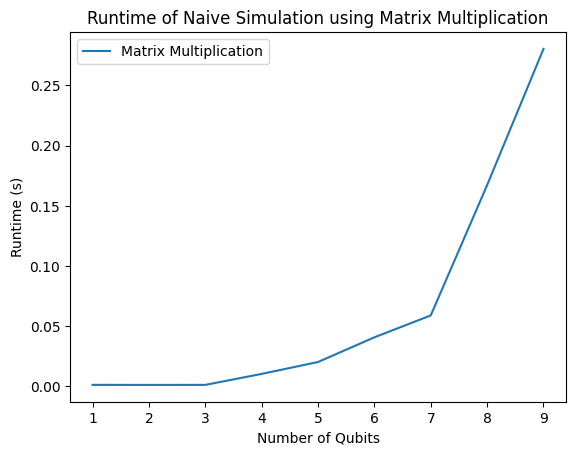

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt

I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
H = np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], dtype=complex)

def initialize_state(n):
    state = np.zeros(2**n, dtype=complex)
    state[0] = 1
    return state

def apply_single_qubit_gate(gate, state, target_qubit, n):
    full_gate = 1
    for i in range(n):
        full_gate = np.kron(full_gate, gate if i == target_qubit else I)
    return full_gate @ state

def apply_cnot_gate(state, control, target, n):
    if n < 2:
        raise ValueError("CNOT requires at least two qubits.")

    full_state = np.zeros_like(state)
    for i in range(2**n):
        bits = np.array(list(np.binary_repr(i, n))).astype(int)

        if bits[control] == 1:
            bits[target] = 1 - bits[target]

        new_index = int("".join(bits.astype(str)), 2)
        full_state[new_index] = state[i]

    return full_state

def measure_runtime_matrix(n):
    state = initialize_state(n)
    start_time = time.time()

    for i in range(n):
        state = apply_single_qubit_gate(H, state, i, n)
        state = apply_single_qubit_gate(X, state, i, n)
    if n >= 2:
        state = apply_cnot_gate(state, 0, 1, n)

    end_time = time.time()
    return end_time - start_time

def plot_naive_runtime():
    qubits = range(1, 10)
    runtimes = [measure_runtime_matrix(n) for n in qubits]
    plt.plot(qubits, runtimes, label='Matrix Multiplication')
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (s)")
    plt.title("Runtime of Naive Simulation using Matrix Multiplication")
    plt.legend()
    plt.show()

plot_naive_runtime()


## **Part 2: Advanced Simulation Using Tensor Multiplication**

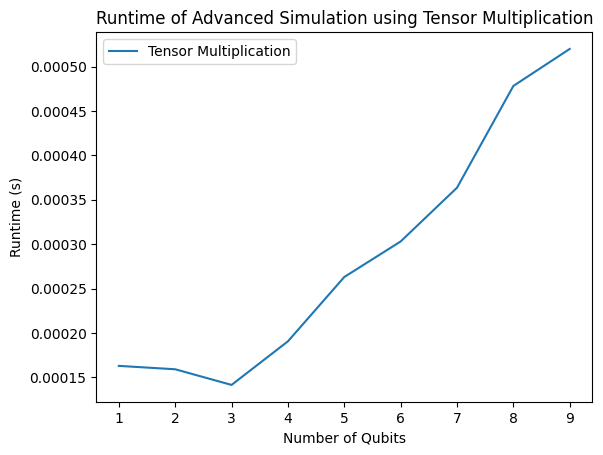

In [11]:
# Advanced tensor-based simulation
def apply_tensor_gate(state, gate, qubit_index):
    n = int(np.log2(state.size))
    state_tensor = state.reshape([2] * n)
    gate_tensor = gate.reshape([2, 2])

    # Apply the gate using tensor contraction along the qubit axis
    new_state = np.tensordot(gate_tensor, state_tensor, axes=([1], [qubit_index]))
    order = list(range(1, qubit_index + 1)) + [0] + list(range(qubit_index + 1, n))
    new_state = np.transpose(new_state, order)
    return new_state.reshape(2 ** n)

# Measure runtime for tensor-based simulation
def measure_runtime_tensor(n):
    state = initialize_state(n)
    start_time = time.time()

    # Apply gates sequentially using tensor contraction
    for i in range(n):
        state = apply_tensor_gate(state, H, i)
        state = apply_tensor_gate(state, X, i)

    end_time = time.time()
    return end_time - start_time

# Plot runtime for tensor-based simulation
def plot_tensor_runtime():
    qubits = range(1, 10)  # Modify based on available resources
    runtimes = [measure_runtime_tensor(n) for n in qubits]
    plt.plot(qubits, runtimes, label='Tensor Multiplication')
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (s)")
    plt.title("Runtime of Advanced Simulation using Tensor Multiplication")
    plt.legend()
    plt.show()

# Run the plot for tensor-based simulation runtime
plot_tensor_runtime()


### **Part 3: Bonus Questions**

In [12]:
def sample_from_state(state, num_samples=1000):
    probabilities = np.abs(state) ** 2
    outcomes = range(len(state))
    samples = np.random.choice(outcomes, size=num_samples, p=probabilities)
    return samples
def expectation_value(state, operator):
    return np.vdot(state, operator @ state).real
